In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

# Exploring Categories

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

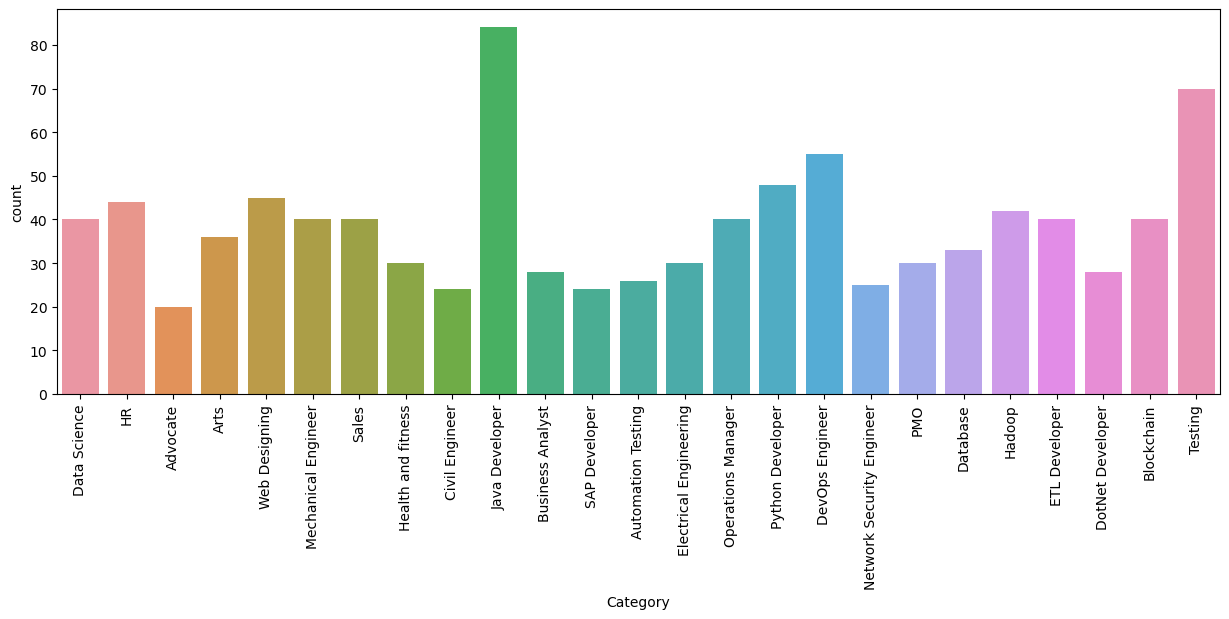

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)
plt.show()


# Knowing more about the resume

In [14]:
df['Category'][0]

'Data Science'

In [15]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Since categories have variable sizes we will oversample it to make all categories equal

In [16]:
# Check the original category distribution
print("Original Category Distribution:")
print(df['Category'].value_counts())

# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df['Category'].value_counts().max()

# Perform oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
df = balanced_df.sample(frac=1).reset_index(drop=True)

# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())

Original Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
Arts                         84
Blockchain                   84
HR    

# Preprocessing data

#### 1 URLs,
#### 2 hashtags,
#### 3 mentions,
#### 4 special letters,
#### 5 punctuations:

In [20]:
import re
def cleanResume(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    return text


In [24]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))


In [25]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my            noorsaeed webiste like is this  and access it  gmain com'

In [26]:
df['Resume'][0] # Removed all the puctuarions hashtags etc

'i other skills course skill name board year of passing grade intermediate grade drawing art examination committee  2011 b examination maharashtra state i academic programme detail national service scheme  camp     sponsored by government of india ministry of youth affairs and sports  new delhi   north maharashtra university  jalgaon  i strengths â   ability to learn from mistakes    honesty â   ready to accept challenges and responsibilities    quick learning  adaptability  confidence  i declaration i  201 your faithfully  pia          jetalal hiralal gorbanjara education details   may 2010 hsc  nashik  maharashtra state board  june 2008 ssc  nashik  maharashtra state board  asst professor     asst professor  skill details   company details   company   kisan arts  description     total work experience   in months   sr        name of organization   college        designation              working period          total experience  no     in months   from            to  1         kisan ar

## Now we will put categories from categorical values to numeric values

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])
df.Category.unique()

array([ 1, 20,  7,  2, 24,  4, 22,  8, 13, 16, 19,  5, 23,  3, 11,  0, 14,
       21, 15, 17,  6, 10,  9, 12, 18])

## Now converting the resume text into vectors so that model can understand

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

## Splitting the data for training and testing

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)
X_train.shape

(1680, 7328)

In [30]:
X_test.shape

(420, 7328)

## Training the model and testing accuracy

In [31]:
# Many models like KNN and Naive Bayes don’t support sparse matrices(matrix with more zeroes), so we convert them.
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test


In [32]:
# # Using the KNN model
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# knn_model = OneVsRestClassifier(KNeighborsClassifier())
# knn_model.fit(X_train, y_train)

# # Train Accuracy
# y_train_knn = knn_model.predict(X_train)
# print("\nKNN Train Accuracy:", accuracy_score(y_train, y_train_knn))

# # Test Accuracy
# y_pred_knn = knn_model.predict(X_test)
# print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))



KNN Train Accuracy: 0.9976190476190476
KNN Test Accuracy: 0.9904761904761905


In [34]:
# Here we are using SVM
from sklearn.svm import SVC

svm_model = OneVsRestClassifier(SVC(kernel='linear'))
svm_model.fit(X_train, y_train)

# Train Accuracy
y_train_svm = svm_model.predict(X_train)
print("\nSVM Train Accuracy:", accuracy_score(y_train, y_train_svm))

# Test Accuracy
y_pred_svm = svm_model.predict(X_test)
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))



SVM Train Accuracy: 1.0
SVM Test Accuracy: 0.9976190476190476


In [35]:
# # Using Random Forest
# from sklearn.ensemble import RandomForestClassifier

# rf_model = OneVsRestClassifier(RandomForestClassifier())
# rf_model.fit(X_train, y_train)

# # Train Accuracy
# y_train_rf = rf_model.predict(X_train)
# print("\nRandom Forest Train Accuracy:", accuracy_score(y_train, y_train_rf))

# # Test Accuracy
# y_pred_rf = rf_model.predict(X_test)
# print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.9976190476190476


In [36]:
# # Using Logistic Regression
# from sklearn.linear_model import LogisticRegression

# lr_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
# lr_model.fit(X_train, y_train)

# # Train Accuracy
# y_train_lr = lr_model.predict(X_train)
# print("\nLogistic Regression Train Accuracy:", accuracy_score(y_train, y_train_lr))

# # Test Accuracy
# y_pred_lr = lr_model.predict(X_test)
# print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_lr))



Logistic Regression Train Accuracy: 1.0
Logistic Regression Test Accuracy: 0.9976190476190476


# Saving the file

In [38]:
import pickle

pickle.dump(tfidf, open('tfidf.pkl', 'wb'))          
pickle.dump(svm_model, open('clf.pkl', 'wb'))         
pickle.dump(le, open("encoder.pkl", 'wb'))             


# Prediction of our model

In [43]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svm_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [44]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)

'Network Security Engineer'

In [45]:
myresume = """
John Doe is an experienced Fitness with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

Certified and passionate Health & Fitness Coach with over 3 years of hands-on experience in helping clients achieve their physical and mental wellness goals. Expertise in developing personalized workout programs, nutritional planning, and lifestyle coaching tailored to individual needs. Proven track record of improving client fitness levels, reducing injury risk, and boosting overall well-being. Adept in both one-on-one and group training environments, with a focus on sustainable, long-term results. Certified in CPR, First Aid, and NASM-CPT, with a strong foundation in anatomy, biomechanics, and holistic health strategies.
"""

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)

'Health and fitness'